# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [4]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [5]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv('api.env')

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [7]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [8]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [10]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [16]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
print(json.dumps(btc_response, indent=1, sort_keys=True))

{
 "data": {
  "1": {
   "circulating_supply": 19350368,
   "id": 1,
   "last_updated": 1681877403,
   "max_supply": 21000000,
   "name": "Bitcoin",
   "quotes": {
    "USD": {
     "market_cap": 584786185142,
     "percent_change_1h": -0.0186217036405824,
     "percent_change_24h": 2.47298408894779,
     "percent_change_7d": -0.233508247966782,
     "percentage_change_1h": -0.0186217036405824,
     "percentage_change_24h": 2.47298408894779,
     "percentage_change_7d": -0.233508247966782,
     "price": 30190.0,
     "volume_24h": 17909267561
    }
   },
   "rank": 1,
   "symbol": "BTC",
   "total_supply": 19350368,
   "website_slug": "bitcoin"
  }
 },
 "metadata": {
  "error": null,
  "num_cryptocurrencies": 3119,
  "timestamp": 1681877403
 }
}


In [17]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
print(json.dumps(eth_response, indent=1, sort_keys=True))

{
 "data": {
  "1027": {
   "circulating_supply": 119368246,
   "id": 1027,
   "last_updated": 1681877400,
   "max_supply": 119368246,
   "name": "Ethereum",
   "quotes": {
    "USD": {
     "market_cap": 249715319577,
     "percent_change_1h": -0.137208536385165,
     "percent_change_24h": 0.451525516689162,
     "percent_change_7d": 10.3813460068271,
     "percentage_change_1h": -0.137208536385165,
     "percentage_change_24h": 0.451525516689162,
     "percentage_change_7d": 10.3813460068271,
     "price": 2089.45,
     "volume_24h": 9795990969
    }
   },
   "rank": 2,
   "symbol": "ETH",
   "total_supply": 119368246,
   "website_slug": "ethereum"
  }
 },
 "metadata": {
  "error": null,
  "num_cryptocurrencies": 3119,
  "timestamp": 1681877400
 }
}


#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [21]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
# YOUR CODE HERE
btc_price

30190.0

In [22]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
# YOUR CODE HERE
eth_price

2089.45

### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [23]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
btc_value


36228.0

In [26]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
# YOUR CODE HERE
eth_value

11074.085

In [27]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = eth_value + btc_value

# Print current cryptocurrency wallet balance
total_crypto_wallet


47302.085

### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [43]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [29]:
# Set the variables for the Alpaca API and secret keys
alpaca_client_id = os.getenv('ALPACA_API_KEY')
alpaca_client_secret = os.getenv('ALPACA_SECRET_KEY')
# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_client_id,
    alpaca_client_secret,
    api_version = "v2"
)


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [30]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY','AGG']

# Set timeframe to 1Day
timeframe = '1Day'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2022-04-18", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-04-18", tz="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [36]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
tickers_df = alpaca.get_bars(
    tickers,
    timeframe=timeframe,
    start=start_date,
    end=end_date).df

# Reorganize the DataFrame
# Separate ticker data
SPY = tickers_df.loc[tickers_df['symbol']=='SPY'].drop('symbol',axis=1)
AGG = tickers_df.loc[tickers_df['symbol']=='AGG'].drop('symbol',axis=1)



# Concatenate the ticker DataFrames
prices_df = pd.concat([SPY,AGG],axis=1,keys=['SPY','AGG'])

# Review the first 5 rows of the Alpaca DataFrame
prices_df.head()


SPY                                       \
                             open      high     low   close     volume   
timestamp                                                                
2022-04-18 04:00:00+00:00  436.81  439.7500  435.61  437.97   65714873   
2022-04-19 04:00:00+00:00  437.86  445.8000  437.68  445.04   77643595   
2022-04-20 04:00:00+00:00  446.92  447.5700  443.48  444.71   64714530   
2022-04-21 04:00:00+00:00  448.54  450.0100  437.10  438.06   84866280   
2022-04-22 04:00:00+00:00  436.91  438.0825  425.44  426.04  132020752   

                                                      AGG                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2022-04-18 04:00:00+00:00      573475  437.860721  103.97  104.0150  103.610   
2022-04-19 04:00:00+00:00      597459  443.071259  103.26  103.4264  102.974   
2022-04-20 04:00:00+00:00      591489  445.609828  103.36  103.7356  103.300   
2022-04-21 04:00:00+00:00      717885  442.785544  103.44  103.4700  102.790   
2022-04-22 04:00:00+00:00      971202  429.814400  102.73  103.1800  102.670   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-04-18 04:00:00+00:00  103.65   8630794       35583  103.732544  
2022-04-19 04:00:00+00:00  103.02   7845947       32654  103.193615  
2022-04-20 04:00:00+00:00  103.61   8433596       32859  103.528896  
2022-04-21 04:00:00+00:00  103.04  11392788       35577  103.047589  
2022-04-22 04:00:00+00:00  102.94   9150132       31457  102.925873

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [40]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = prices_df['AGG']['close']

# Print the AGG closing price
agg_last_close_price = agg_close_price[-1]
agg_last_close_price

99.04

In [41]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = prices_df['SPY']['close']

# Print the SPY closing price
spy_last_close_price = spy_close_price[-1]
spy_last_close_price

414.21

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [44]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_last_close_price

# Print the current value of the bond portfolio
agg_value


19808.0

In [46]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_last_close_price 

# Print the current value of the stock portfolio
spy_value


45563.1

In [47]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
total_stocks_bonds


65371.1

In [49]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance
print(f"Total Portfolio value: ${total_portfolio:.2f}")


Total Portfolio value: $112673.18


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [50]:
# Consolidate financial assets data into a Python list
savings_date = [total_crypto_wallet,total_stocks_bonds]

# Review the Python list savings_data
savings_date
    

[47302.085, 65371.1]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [51]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_date, columns=['amount'],index=['crypto','stock/bond'])

# Display the savings_df DataFrame
savings_df


,amount
crypto,47302.085
stock/bond,65371.100


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Percentage of Crypto and Stock/Bonds'}, ylabel='amount'>

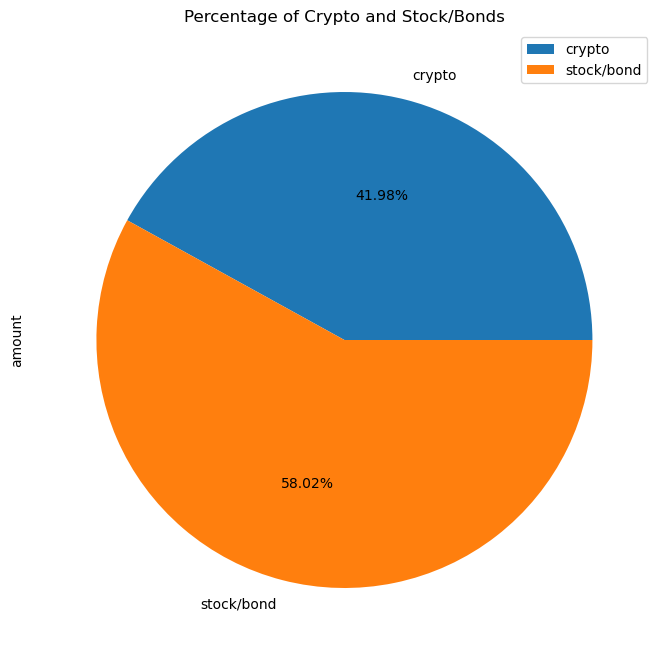

In [59]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(title="Percentage of Crypto and Stock/Bonds",y="amount",figsize=(8,10),autopct='%1.2f%%')


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [62]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3 * monthly_income
emergency_fund_value

36000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [64]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print('Congratulations, you have enough money in your emergency fund')
elif total_portfolio == emergency_fund_value:
    print("Congratulations, you are in balance, you have the exact amount you need in your emergency fund")
else:
    print(f"Sorry, you don't have enough money in your emergency fund.\nYou are ${(emergency_fund_value-total_portfolio):.2f} away from having a proper emergency fund.")


Congratulations, you have enough money in your emergency fund


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [67]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp("2020-04-18", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-04-18", tz="America/New_York").isoformat()

In [68]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
three_year_tickers_df = alpaca.get_bars(
    tickers,
    timeframe=timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
SPY = three_year_tickers_df.loc[three_year_tickers_df['symbol']=='SPY'].drop('symbol',axis=1)
AGG = three_year_tickers_df.loc[three_year_tickers_df['symbol']=='AGG'].drop('symbol',axis=1)

# Concatenate the ticker DataFrames
prices_three_years_df = pd.concat([SPY,AGG],axis=1,keys=['SPY','AGG'])

# Display both the first and last five rows of the DataFrame
display(prices_three_years_df.head())
prices_three_years_df.tail()


SPY                                       \
                             open      high     low   close     volume   
timestamp                                                                
2020-04-20 04:00:00+00:00  282.61  286.7912  281.35  281.76  100109301   
2020-04-21 04:00:00+00:00  276.73  278.0400  272.02  273.17  126385698   
2020-04-22 04:00:00+00:00  278.35  281.0000  276.91  279.04   93524584   
2020-04-23 04:00:00+00:00  280.49  283.9400  278.75  279.01  104753796   
2020-04-24 04:00:00+00:00  280.73  283.7000  278.50  282.89   85169903   

                                                      AGG                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2020-04-20 04:00:00+00:00      600459  283.731259  117.15  117.28  116.94   
2020-04-21 04:00:00+00:00      923551  274.755317  117.43  117.44  117.07   
2020-04-22 04:00:00+00:00      527777  278.482513  117.16  117.24  116.94   
2020-04-23 04:00:00+00:00      688622  280.966290  117.33  117.45  117.19   
2020-04-24 04:00:00+00:00      438571  281.032342  117.22  117.39  117.20   

                                                                      
                              close   volume trade_count        vwap  
timestamp                                                             
2020-04-20 04:00:00+00:00  117.0800  3847904       18508  117.030930  
2020-04-21 04:00:00+00:00  117.1400  4660507       19425  117.166762  
2020-04-22 04:00:00+00:00  117.1400  4647244       17538  117.056879  
2020-04-23 04:00:00+00:00  117.4200  4331115       18473  117.341656  
2020-04-24 04:00:00+00:00  117.3595  3162137       14100  117.295003

SPY                                      \
                             open    high       low   close    volume   
timestamp                                                               
2023-04-12 04:00:00+00:00  411.87  412.17  407.4400  408.05  86440377   
2023-04-13 04:00:00+00:00  409.18  413.84  407.9922  413.47  85814754   
2023-04-14 04:00:00+00:00  412.81  415.09  410.0600  412.46  75973321   
2023-04-17 04:00:00+00:00  412.37  413.96  411.0850  413.94  66436399   
2023-04-18 04:00:00+00:00  415.58  415.72  412.7802  414.21  61604564   

                                                      AGG                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2023-04-12 04:00:00+00:00      639926  409.706051  100.17  100.2000  99.610   
2023-04-13 04:00:00+00:00      566796  411.717306  100.16  100.2677  99.805   
2023-04-14 04:00:00+00:00      573427  412.263399   99.56   99.5900  99.320   
2023-04-17 04:00:00+00:00      477978  412.589612   99.13   99.1750  98.880   
2023-04-18 04:00:00+00:00      477409  414.072352   98.91   99.1600  98.910   

                                                                  
                           close   volume trade_count       vwap  
timestamp                                                         
2023-04-12 04:00:00+00:00  99.93  7226122       33545  99.885733  
2023-04-13 04:00:00+00:00  99.89  3964799       18405  99.967812  
2023-04-14 04:00:00+00:00  99.40  4503010       19909  99.405533  
2023-04-17 04:00:00+00:00  98.90  4441277       18511  98.944350  
2023-04-18 04:00:00+00:00  99.04  4708306       17596  99.023574

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [71]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
thirty_year_simulation = MCSimulation(
    prices_three_years_df,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Review the simulation input data
thirty_year_simulation.portfolio_data.head()


SPY                                       \
                             open      high     low   close     volume   
timestamp                                                                
2020-04-20 04:00:00+00:00  282.61  286.7912  281.35  281.76  100109301   
2020-04-21 04:00:00+00:00  276.73  278.0400  272.02  273.17  126385698   
2020-04-22 04:00:00+00:00  278.35  281.0000  276.91  279.04   93524584   
2020-04-23 04:00:00+00:00  280.49  283.9400  278.75  279.01  104753796   
2020-04-24 04:00:00+00:00  280.73  283.7000  278.50  282.89   85169903   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2020-04-20 04:00:00+00:00      600459  283.731259          NaN  117.15   
2020-04-21 04:00:00+00:00      923551  274.755317    -0.030487  117.43   
2020-04-22 04:00:00+00:00      527777  278.482513     0.021488  117.16   
2020-04-23 04:00:00+00:00      688622  280.966290    -0.000108  117.33   
2020-04-24 04:00:00+00:00      438571  281.032342     0.013906  117.22   

                                                                          \
                             high     low     close   volume trade_count   
timestamp                                                                  
2020-04-20 04:00:00+00:00  117.28  116.94  117.0800  3847904       18508   
2020-04-21 04:00:00+00:00  117.44  117.07  117.1400  4660507       19425   
2020-04-22 04:00:00+00:00  117.24  116.94  117.1400  4647244       17538   
2020-04-23 04:00:00+00:00  117.45  117.19  117.4200  4331115       18473   
2020-04-24 04:00:00+00:00  117.39  117.20  117.3595  3162137       14100   

                                                    
                                 vwap daily_return  
timestamp                                           
2020-04-20 04:00:00+00:00  117.030930          NaN  
2020-04-21 04:00:00+00:00  117.166762     0.000512  
2020-04-22 04:00:00+00:00  117.056879     0.000000  
2020-04-23 04:00:00+00:00  117.341656     0.002390  
2020-04-24 04:00:00+00:00  117.295003    -0.000515

In [72]:
%%time
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
thirty_year_simulation.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\lmros\Fintech\Challenges\Challenge5\fintech-Challenge5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996862,1.001464,0.998245,0.997728,0.998459,0.983073,1.003548,1.000284,1.006704,0.997614,...,1.006011,0.999551,0.983158,1.010934,1.000779,0.996937,1.004569,0.993737,0.997193,0.994954
2,1.000796,0.999041,0.994600,1.003455,1.003876,0.991818,1.003961,0.999712,1.012002,1.000400,...,0.993489,0.994553,0.979090,0.999169,0.997089,1.001744,1.003520,0.983774,0.987464,1.010977
3,1.007031,1.004903,0.991333,1.000682,1.003254,0.994628,0.993709,0.998359,1.003863,0.997917,...,0.981391,1.007121,0.969678,0.992442,1.002592,1.001473,1.006893,0.976541,0.996663,1.018405
4,1.003660,1.007167,0.991882,1.002832,1.005737,0.989059,0.982342,0.991245,1.001560,0.993944,...,0.974909,1.006774,0.973345,0.991086,0.999736,0.993197,0.996499,0.971402,0.995201,1.015867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.847298,6.420759,3.887808,3.988387,24.066807,7.020944,5.284197,15.969820,6.440724,4.432132,...,6.875713,4.947405,8.951967,5.012986,16.312299,15.048897,2.635308,2.867436,2.908044,6.620494
7557,1.826784,6.423516,3.938225,3.979050,24.111481,6.987473,5.311915,16.097475,6.406295,4.448865,...,6.891463,4.985436,9.032064,5.082086,16.248680,14.834429,2.647851,2.840842,2.874202,6.574840
7558,1.820524,6.421737,3.995607,3.983496,24.212563,6.976572,5.319486,16.142710,6.419903,4.466480,...,6.947054,4.940783,8.906477,5.055438,15.986133,14.814466,2.660552,2.855416,2.907032,6.561059
7559,1.807655,6.396293,3.957244,4.017404,24.270751,7.017645,5.306117,16.178789,6.359884,4.417764,...,7.050607,4.922436,8.908939,5.126056,15.865409,14.760401,2.627910,2.837601,2.901036,6.510775


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

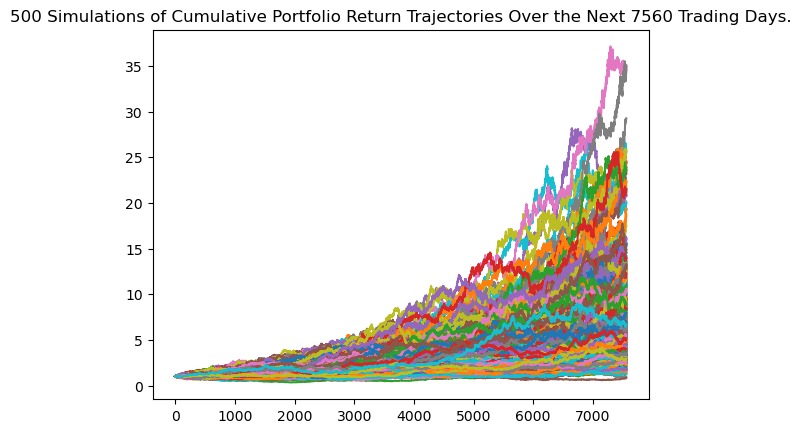

In [73]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
thirty_year_simulation.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

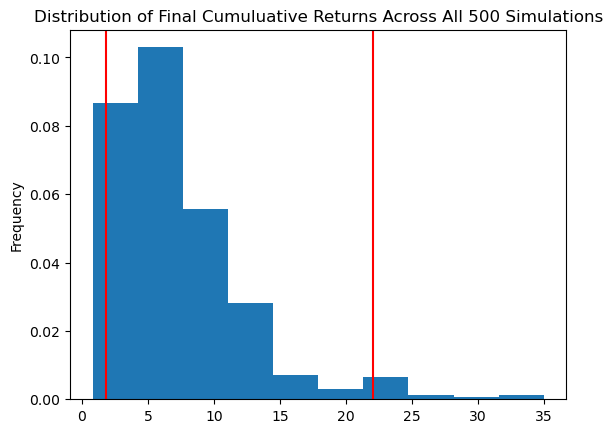

In [74]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
thirty_year_simulation.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [75]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
summary_simulation_cummulative_return = thirty_year_simulation.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
display(summary_simulation_cummulative_return)

count           500.000000
mean              7.213703
std               4.909378
min               0.821254
25%               3.976301
50%               6.013759
75%               8.951430
max              35.001710
95% CI Lower      1.798585
95% CI Upper     22.037429
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [77]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The total fund of Stocks and Bonds is ${total_stocks_bonds:.2f}")


The total fund of Stocks and Bonds is $65371.10


1.7985847494321912

In [81]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = total_stocks_bonds * summary_simulation_cummulative_return[8]
ci_upper_thirty_cumulative_return = total_stocks_bonds * summary_simulation_cummulative_return[9]

# Print the result of your calculations
print(f"The Upper limit with 95% confidence is ${ci_upper_thirty_cumulative_return:.2f}\nThe Lower limit with 95% confidence is ${ci_lower_thirty_cumulative_return:.2f}")


The Upper limit with 95% confidence is $1440611.00
The Lower limit with 95% confidence is $117575.46


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [82]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples - three_year_tickers_df
ten_year_simulation = MCSimulation(
    prices_three_years_df,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Review the simulation input data
ten_year_simulation.portfolio_data.head()


SPY                                       \
                             open      high     low   close     volume   
timestamp                                                                
2020-04-20 04:00:00+00:00  282.61  286.7912  281.35  281.76  100109301   
2020-04-21 04:00:00+00:00  276.73  278.0400  272.02  273.17  126385698   
2020-04-22 04:00:00+00:00  278.35  281.0000  276.91  279.04   93524584   
2020-04-23 04:00:00+00:00  280.49  283.9400  278.75  279.01  104753796   
2020-04-24 04:00:00+00:00  280.73  283.7000  278.50  282.89   85169903   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2020-04-20 04:00:00+00:00      600459  283.731259          NaN  117.15   
2020-04-21 04:00:00+00:00      923551  274.755317    -0.030487  117.43   
2020-04-22 04:00:00+00:00      527777  278.482513     0.021488  117.16   
2020-04-23 04:00:00+00:00      688622  280.966290    -0.000108  117.33   
2020-04-24 04:00:00+00:00      438571  281.032342     0.013906  117.22   

                                                                          \
                             high     low     close   volume trade_count   
timestamp                                                                  
2020-04-20 04:00:00+00:00  117.28  116.94  117.0800  3847904       18508   
2020-04-21 04:00:00+00:00  117.44  117.07  117.1400  4660507       19425   
2020-04-22 04:00:00+00:00  117.24  116.94  117.1400  4647244       17538   
2020-04-23 04:00:00+00:00  117.45  117.19  117.4200  4331115       18473   
2020-04-24 04:00:00+00:00  117.39  117.20  117.3595  3162137       14100   

                                                    
                                 vwap daily_return  
timestamp                                           
2020-04-20 04:00:00+00:00  117.030930          NaN  
2020-04-21 04:00:00+00:00  117.166762     0.000512  
2020-04-22 04:00:00+00:00  117.056879     0.000000  
2020-04-23 04:00:00+00:00  117.341656     0.002390  
2020-04-24 04:00:00+00:00  117.295003    -0.000515

In [83]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
ten_year_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\lmros\Fintech\Challenges\Challenge5\fintech-Challenge5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999111,0.994619,0.997159,1.015271,0.986583,0.980069,0.994700,1.013065,1.018684,0.997293,...,1.011786,1.000812,1.005765,1.011937,1.002414,0.986018,1.006133,1.002507,1.002252,0.994672
2,1.016463,0.995668,1.006626,1.015714,0.986090,0.967742,1.018662,1.001628,1.003295,0.993977,...,1.015533,1.001744,1.009174,1.014798,1.007615,0.987735,0.993373,1.010696,1.006893,0.988949
3,1.024651,0.992759,0.997680,1.011014,0.975964,0.965626,1.015240,1.004888,1.006816,0.985311,...,0.999035,1.003247,1.004161,1.014660,1.017668,0.985750,0.970244,1.012466,0.998531,0.972589
4,1.037072,0.990547,0.989560,1.010749,0.972767,0.963379,1.010684,1.011031,1.001030,0.983829,...,1.020653,1.019333,1.004064,1.007138,1.015375,1.001499,0.952234,0.995867,0.980977,0.983233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.601240,6.321710,1.200323,2.266392,2.471114,2.621210,1.919022,4.758422,2.797491,4.297553,...,3.912847,2.768613,3.562712,5.320057,3.472934,6.798878,1.918608,1.629072,2.641902,1.245046
2517,5.624378,6.330523,1.206614,2.273372,2.493506,2.642933,1.895119,4.755905,2.815812,4.254466,...,3.962187,2.799702,3.524697,5.294549,3.464642,6.826694,1.899895,1.617973,2.648807,1.244879
2518,5.621149,6.305090,1.230471,2.277841,2.512772,2.639693,1.846574,4.767811,2.771339,4.299545,...,4.007494,2.798049,3.545150,5.294055,3.412709,6.838176,1.895927,1.607344,2.661123,1.234486
2519,5.555690,6.313663,1.227133,2.269269,2.538648,2.642012,1.822692,4.752309,2.832414,4.324048,...,4.087120,2.804752,3.541650,5.252356,3.403240,6.917218,1.899682,1.651422,2.630287,1.223908


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

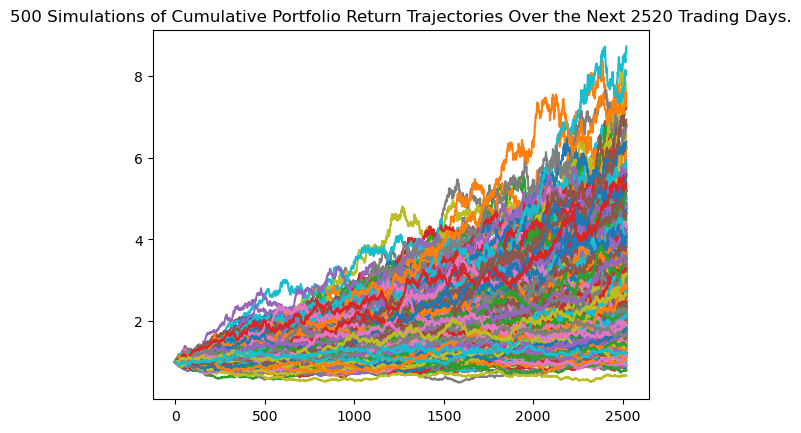

In [84]:
# Visualize the 10-year Monte Carlo simulation by creating an
ten_year_simulation.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

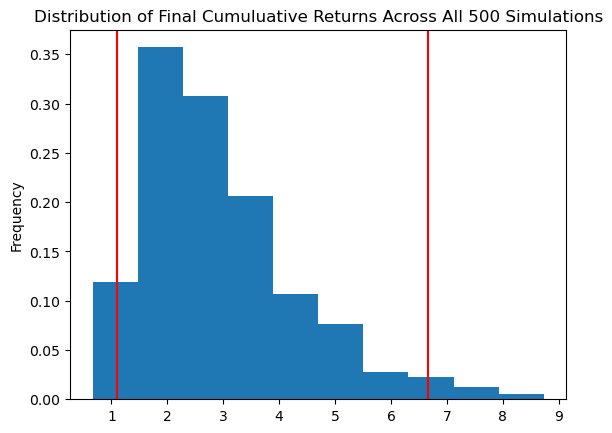

In [85]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
ten_year_simulation.plot_distribution()


In [86]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
summary_simulation_cummulative_return_ten_years = ten_year_simulation.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
display(summary_simulation_cummulative_return_ten_years)

count           500.000000
mean              2.926500
std               1.371127
min               0.665931
25%               1.923695
50%               2.695958
75%               3.559710
max               8.731808
95% CI Lower      1.099473
95% CI Upper      6.664412
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [87]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The total fund of Stocks and Bonds is ${total_stocks_bonds:.2f}")


The total fund of Stocks and Bonds is $65371.10


In [88]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = total_stocks_bonds * summary_simulation_cummulative_return_ten_years[8]
ci_upper_ten_cumulative_return = total_stocks_bonds * summary_simulation_cummulative_return_ten_years[9]

# Print the result of your calculations
print(f"The Upper limit with 95% confidence is ${ci_upper_ten_cumulative_return:.2f}\nThe Lower limit with 95% confidence is ${ci_lower_ten_cumulative_return:.2f}")



The Upper limit with 95% confidence is $435659.91
The Lower limit with 95% confidence is $71873.75


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

**Answer** : **It is hard to tell, in depend on many factors, the age of each of the members, asumming they were planning to retire at 65 years with an average of around 200k for 10 years and around 450k for 30 years. It is risky because retiring at 45 years with around 200k or even worse with a 71k savings isn't enough.**